IMPORTANT! Before beginning any lab assignment, be sure to **make your own copy** of the notebook and name it "lastname - Lab 4" or something similar.

# **Lab 4: Advanced Predictive Analytics in Python (Part 2)**
## **Objective**
In this lab, we will continue working with the gaming churn dataset from Lab 3. The goal is to finish preparing the dataset for modeling (and then - visualize it!).

---



## **Scenario: Player Churn in Online Gaming** 🎮 (cont.)

### **Background**
In case you need a reminder from Lab 3:
* You're a data analyst at a major online gaming platform that offers subscription-based access to multiple multiplayer games.
* The company has noticed a recent decline in active subscriptions.
* It's your job to analyze this player churn, identify trends, and recommend strategies to improve player retention.

In the previous activity, we learned that **we had a few outliers** in our dataset that had a pretty negative impact on some of our visualizations; on the other hand, we also learned there were **no missing values**, so that's great! Now that we've had a chance to reflect on our understanding of the business and data - and completed our EDA - we can move on to the Data Preparation stage.

**Your goal:** Prepare the dataset by handling data quality issues, engineering relevant features, and implementing initial predictive models to classify whether a player is likely to churn.

---

Before we start, we should load the dataset and refresh ourselves on the details. Make sure to upload the ```gaming_churn_data.csv``` file to the Colab workspace, and then run the following code block:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("gaming_churn_data.csv")

# Display basic dataset information
print(".info()")
df.info() # What does the info() method tell us?
print("\n.head()\n", df.head())

# Show the summary statistics of the data set as is
print("\nSummary statistics (.describe()):")
print(df.describe())

# Visualize distributions
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[df.columns])
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features")
plt.show()

What interesting insights did you find from the output?

*Double-click here to add your answers*

## **Part 1: Data Preparation & Feature Engineering**


---

### 1️⃣ **Handling Data Issues**

First, before we build any models, we need to ensure our data is clean and reliable. In Lab 3, we identified some **extreme outliers** in our dataset, particularly in age, subscription length, playtime, and spending patterns. These outliers may negatively affect our predictions.

Luckily, we didn't have any missing data, so we don't need to deal with that. But we **do** need to fix these outliers; first, let's make sure we remember where they were.

You put in the effort to find outliers last time, so this time, all you need to do is review and run the following code block:

In [ ]:
# The following code contains outlier detection for an ENTIRE dataset
# Pay close attention - we avoid checking column by column with this method

# Convert non-numeric columns before applying outlier detection
numeric_df = df.select_dtypes(include=[np.number])

# Identify outliers using interquartile range (IQR)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound))
print("Number of outliers per column:")
print(outliers.sum())

From the output, we can see exactly where those outliers were - perfect. Now we have identified them, we need to **decide how to handle them**. Instead of removing data, we will apply a **clamp transformation**, which sets extreme values to predefined upper and lower limits based on the IQR.

#### **Your Task:**
1. Apply a **clamp transformation** using the .clip() method to cap extreme values.
2. Replace the modified numeric columns in the main dataset.
3. Visualize distributions with boxplots after handling outliers to confirm changes.

Example output is shown below.


Summary statistics after handling outliers:
         PlayerID         Age  SubscriptionLength  PlayTimePerWeek  \
count  100.000000  100.000000          100.000000       100.000000   
mean    50.500000   30.211250           15.141250        11.918625   
std     29.011492    7.236484            8.268548         6.471844   
min      1.000000   19.000000            4.000000         2.900000   
25%     25.750000   25.000000            8.000000         6.375000   
50%     50.500000   29.000000           13.000000        10.400000   
75%     75.250000   36.250000           21.250000        15.850000   
max    100.000000   53.125000           41.125000        30.062500   

       InGamePurchases  CustomerSupportCalls  
count       100.000000            100.000000  
mean         44.698250              1.410000  
std          36.301501              1.055003  
min           5.000000              0.000000  
25%          13.525000              1.000000  
50%          31.250000              1.0000

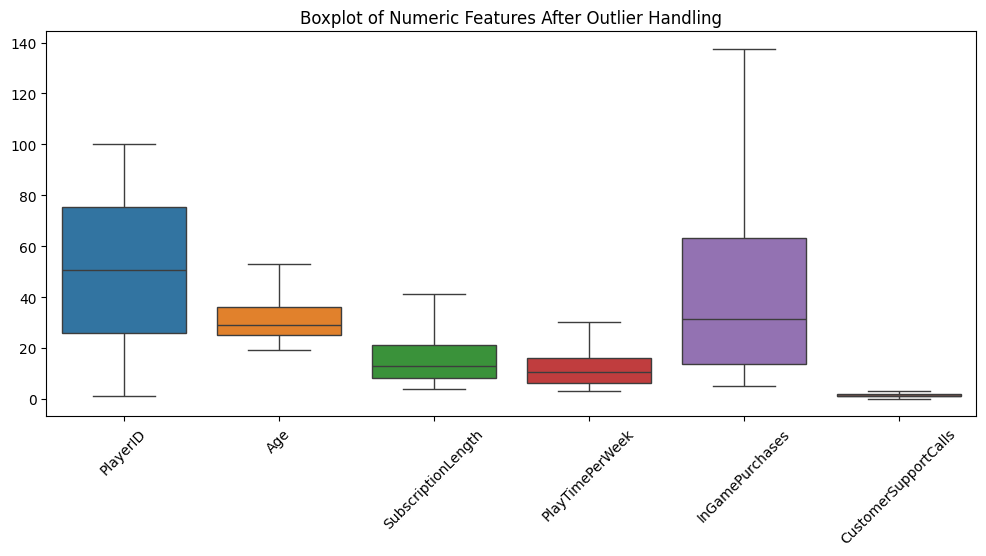

In [57]:
# TODO: 1. Apply clamp transformation to handle outliers
# Hint: Clip df values based on lower and upper bounds from IQR calculations above
numeric_df =

# 2. Replace cleaned values in the main dataset (done for you)
df[numeric_df.columns] = numeric_df

# Show the effects of handling outliers
print("\nSummary statistics after handling outliers:")
print(df.describe())

# TODO: 3. Visualize distributions after handling outliers
# Hint: Check the first code cell - we made a boxplot up there!


---

### **2️⃣ Feature Engineering**

Your team has brainstormed not one, but TWO more important features: PlayerType and SpendingRatio.

* ```PlayerType``` is a categorical feature that will categorize players based on different raw attributes, allowing us to understand different playstyles better.
  * We will derive `PlayerType` using the following criteria:
    - **Hardcore:** High `SubscriptionLength`, high `PlayTimePerWeek`, and frequent `InGamePurchases`.
    - **Committed:** Moderate `SubscriptionLength`, above-average `PlayTimePerWeek`, and some `InGamePurchases`.
    - **Regular:** Short-to-moderate `SubscriptionLength` but still engaged in gameplay.
    - **Casual:** Low `SubscriptionLength` and low engagement.
* `SpendingRatio` is a numerical feature that represents the relationship between `InGamePurchases` and `SubscriptionLength`.

Below, your team already managed to finish coding the addition of PlayerType, but you still have a little work to do; there's a new feature to add yet, and we need to convert our categorical feature into something we can use.

#### **Task:**
1. Create a new derived feature ```SpendingRatio``` by dividing InGamePurchases by SubscriptionLength.
2. Create a histplot of SpendingRatio with 30 bins (and set ```kde=True```).



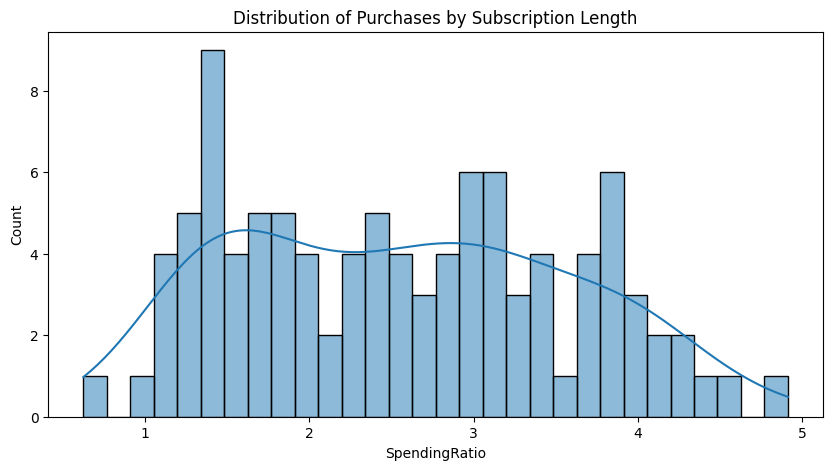

In [59]:
# We created a derived categorical feature based on SubscriptionLength, PlayTimePerWeek, and InGamePurchases
# This function actually categorizes
def categorize_player(row):
    if row['SubscriptionLength'] > 12 and row['PlayTimePerWeek'] > 20 and row['InGamePurchases'] > 50:
        return 'Hardcore'
    elif row['SubscriptionLength'] > 6 and row['PlayTimePerWeek'] > 10 and row['InGamePurchases'] > 20:
        return 'Committed'
    elif row['SubscriptionLength'] > 3 and row['PlayTimePerWeek'] > 5:
        return 'Regular'
    else:
        return 'Casual'

# This line creates the new column and fills it, giving us a new feature!
df['PlayerType'] = df.apply(categorize_player, axis=1) # Try print(df.head()) to see your new column!

# TODO: 1. Create a new feature, SpendingRatio (InGamePurchases / SubscriptionLength)

# TODO: 2. Visualize distributions with a histplot
# Set plt.figure's figsize to (10,5)
# Use the histplot method with SpendingRatio, 30 bins, and kde=True
# Give your plot a title with .title()
# Call plt.show()


---

### **3️⃣ Encoding Categorical Variables**

Now we have a categorical feature, and that means we need to encode it for modeling.

Examine and run the following code to apply one-hot encoding:


In [ ]:
# Apply one-hot encoding to the new categorical feature
df = pd.get_dummies(df, columns=['PlayerType'], drop_first=True)

# Label encode the target variable
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

Can you think of any other important features that could inform player churn statistics?

---

## **Part 2: Modeling & Evaluation**

To train machine learning models, we need to:

* Select the appropriate descriptive features (drop unnecessary columns like `PlayerID`).
* Split the dataset into **training (80%)** and **testing (20%)** subsets.

#### **Task:**
1. Select the appropriate descriptive features for modeling.
2. Split the dataset into training and testing sets.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# TODO: 1. Select features for modeling
# Hint: Set X to all columns except the target feature, and set y to only the target feature
X = # Use the .drop() method
y =

# TODO: 2. Perform train-test split
X_train, X_test, y_train, y_test = # Call the train_test_split function on X and y

---

We will train two models:
* **Logistic Regression**: A simple baseline model.
* **Random Forest Classifier**: A more powerful ensemble-based model.

### **1️⃣ Train a Logistic Regression Model**
Run the following code to train our logistic regression model and analyze the results:

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Performance:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")

---

### **2️⃣ Try Another Model (Random Forest)**

#### **Task:**
1. Train a Random Forest model and evaluate the performance.

In [51]:
# The following line initializes the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# TODO: 1. Train a RF model
# Hint: Start by using the .fit() method with rf_model, and pass X_train and y_train as parameters

# Hint: Create a new subset using the .predict() method with the X_test subset
y_pred_rf =

# Hint: Visualize your RF model with a confusion matrix, classification report, and accuracy score
# Hint: Check the Logistic Regression model for help!
print("Random Forest Performance:")

print("Accuracy: ")

Random Forest Performance:
[[13  1]
 [ 0  6]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.86      1.00      0.92         6

    accuracy                           0.95        20
   macro avg       0.93      0.96      0.94        20
weighted avg       0.96      0.95      0.95        20

Accuracy: 0.9500


---

## **📌 Reflection Questions**

1. Which model performed better? Why?
2. How could the gaming company use this model to reduce churn?
3. What additional data might improve prediction accuracy?

Add your answers below.


*Double-click here & jot down your reflections!*

## Deliverables
*Options*

 * **Colab link**: Make sure to update the share settings, and submit a link to your Colab Notebook to the D2L dropbox. YOU WILL NEED TO SUBMIT SOMETHING WITH IT, so just submit a blank text file or something.
 * **.ipynb file**: Download the Jupyter notebook file from Colab or wherever you're working on it and submit that to D2L.
 * **PDF**: A PDF is fine if you want to take screenshots and answer in a Word doc; just be sure to save as a PDF, not a .docx file, before you submit.

 You only need to submit **one of these things**!!!